In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam

In [37]:
data = pd.read_csv('encoded_normalized_data.csv')
data

,sourceID,timediff,PTAB,BodyGroup_from,BodyGroup_to
0,10.0,0.0,0.365065,9,9
1,0.0,40.0,0.365065,9,9
2,4.0,45.0,0.365681,9,9
3,5.0,52.0,0.365681,9,9
4,5.0,68.0,0.365681,9,9
...,...,...,...,...,...
3795,4.0,1210.0,0.593200,6,6
3796,5.0,1215.0,0.593200,6,6
3797,6.0,1224.0,0.593200,6,6
3798,2.0,1243.0,0.593200,6,6


In [38]:
# Prepare the input (X) and output (y) data
X = data[['sourceID','PTAB','BodyGroup_from', 'BodyGroup_to']].values
y = data['timediff'].values

# Reshape X for LSTM input (samples, time steps(that we are looking back), features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

print("\nShape of X:", X.shape) 
print("Shape of y:", y.shape)    

original_indices = data.index  # Save the original indices

# Split the data into train and temporary sets (60% train, 40% temp)
X_train, X_temp, y_train, y_temp, train_indices, temp_indices = train_test_split(
    X, y, original_indices, test_size=0.4, random_state=42)

# Further split the temporary set into validation and test sets (15% val, 25% test)
X_val, X_test, y_val, y_test, val_indices, test_indices = train_test_split(
    X_temp, y_temp, temp_indices, test_size=0.625, random_state=42)

# Display shapes of the split datasets
print("\nTraining set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Test set shape (X_test, y_test):", X_test.shape, y_test.shape)

print("Length of train_indices:", len(train_indices))
print("Length of temp_indices:", len(temp_indices))
print("Length of val_indices:", len(val_indices))
print("Length of test_indices:", len(test_indices))


Shape of X: (3800, 1, 4)
Shape of y: (3800,)

Training set shape (X_train, y_train): (2280, 1, 4) (2280,)
Validation set shape (X_val, y_val): (570, 1, 4) (570,)
Test set shape (X_test, y_test): (950, 1, 4) (950,)
Length of train_indices: 2280
Length of temp_indices: 1520
Length of val_indices: 570
Length of test_indices: 950


In [39]:

# LSTM model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu', return_sequences=True),
    Dropout(0.2),  # Dropout layer with 20% dropout rate
    LSTM(30, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    verbose=1
)


Epoch 1/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 148115.7500 - val_loss: 209802.0312
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 135243.2812 - val_loss: 166185.3125
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 97717.4062 - val_loss: 157751.4219
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101988.7578 - val_loss: 157096.2188
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95377.1562 - val_loss: 156227.2500
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99881.2031 - val_loss: 155524.7812
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 91277.1562 - val_loss: 154762.6250
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95713.5234 - val_loss: 154590.8750
Epoch 9/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 95589.7656 - val_loss: 153841.0156
Epoch 10/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 96799.1797 - val_loss: 153589.3594
Epoch 11/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [40]:
# Evaluate on the Test Set
test_loss = model.evaluate(X_test, y_test)
print(f"\nTest Loss: {test_loss}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - loss: 118767.1094

Test Loss: 104849.359375


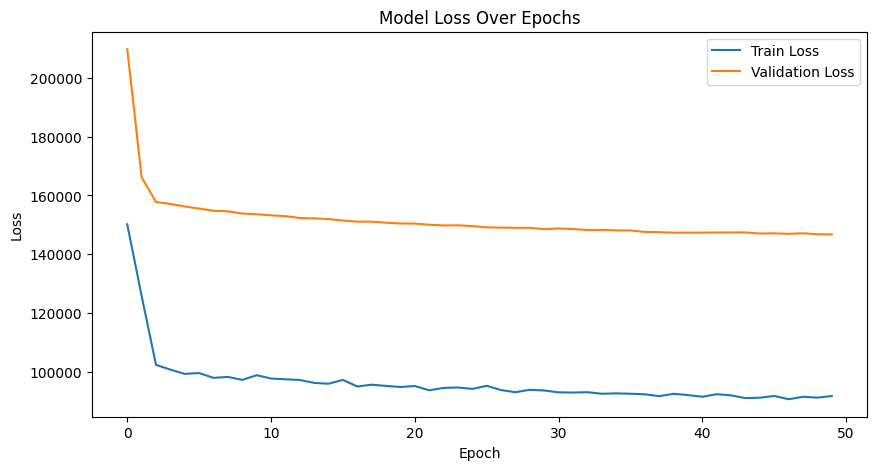

In [41]:
# Visualize Training and Validation Loss Over Epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


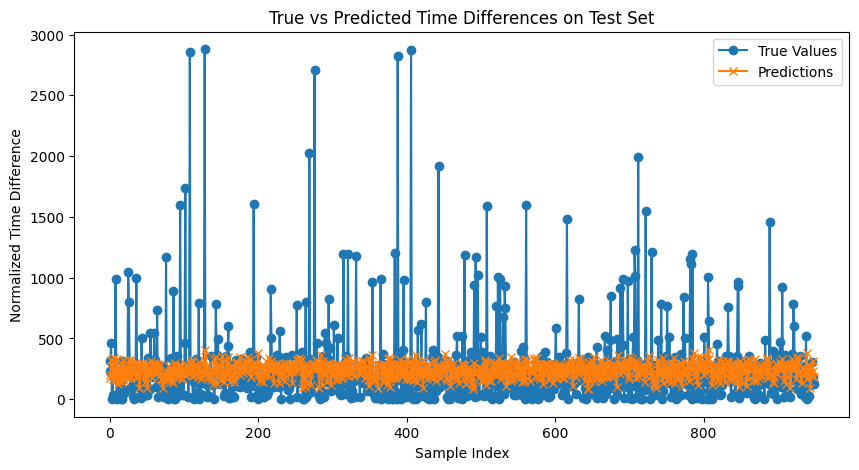

In [42]:
# Make Predictions on the Test Set
predictions = model.predict(X_test)

# Plot true vs. predicted values (for the normalized data)
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='True Values', marker='o')
plt.plot(predictions.flatten(), label='Predictions', marker='x')
plt.title('True vs Predicted Time Differences on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('Normalized Time Difference')
plt.legend()
plt.show()


In [43]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data[['timediff']]) 

predictions = np.random.rand(len(X_test)) 

# Denormalize the predictions
predictions_denormalized = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
filtered_data = data.iloc[test_indices].reset_index(drop=True)
output_path = "dataset_denormalized_predictions.csv"
filtered_data.to_csv(output_path, index=False)
print("Denormalized predictions saved successfully!")

# Check if predictions length matches filtered data length
if len(predictions_denormalized) == len(filtered_data):

    filtered_data['Predicted Values'] = predictions_denormalized

    # Save the updated dataset to a CSV file
    output_path = "dataset_normalized_predictions.csv"
    filtered_data.to_csv(output_path, index=False)

    # Display a few rows to confirm
    print("First few rows of the dataset with denormalized predictions:")
    print(filtered_data.head())
else:
    print("Length mismatch between predictions and filtered data. Check your dataset and predictions alignment.")
    
print("Length of predictions:", len(predictions_denormalized))
print("Length of filtered data:", len(filtered_data))

Denormalized predictions saved successfully!
First few rows of the dataset with denormalized predictions:
   sourceID  timediff      PTAB  BodyGroup_from  BodyGroup_to   
0       1.0     234.0  0.441199               7             6  \
1       4.0     311.0  0.593093               1             1   
2       5.0     465.0  0.998180               1             6   
3      10.0       0.0  0.998099              10             9   
4       5.0      33.0  0.193923               6             4   

   Predicted Values  
0       1015.551184  
1        286.916314  
2       2376.310045  
3       1654.846864  
4       1383.322870  
Length of predictions: 950
Length of filtered data: 950


In [44]:
#Eavulate Model Performance metrices
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_denormalized, predictions_denormalized)
mse = mean_squared_error(y_test_denormalized, predictions_denormalized)
r2 = r2_score(y_test_denormalized, predictions_denormalized)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")

NameError: name 'y_test_denormalized' is not defined

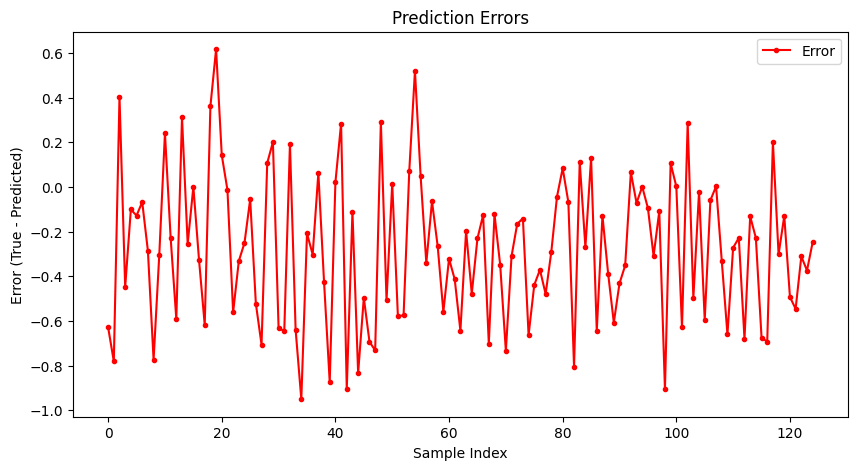

In [13]:
#Plot Error metrices
errors = y_test_denormalized - predictions_denormalized

plt.figure(figsize=(10, 5))
plt.plot(errors, label='Error', color='red', marker='.')
plt.title('Prediction Errors')
plt.xlabel('Sample Index')
plt.ylabel('Error (True - Predicted)')
plt.legend()
plt.show()

In [ ]:

predicted_values = predictions_denormalized.flatten() 

# Print all predicted values
print("Predicted Values:")
print(predicted_values)


print("\nFirst 10 Predicted Values:")
print(predicted_values[:10])

Predicted Values:
[0.74372325 0.905151   0.0560107  0.48836804 0.20539582 0.14675077
 0.19771439 0.28607433 0.9384559  0.55036458 0.09149159 0.25231308
 0.8356951  0.02517198 0.36378594 0.25790866 0.41875044 0.70616512
 0.12020876 0.37550991 0.81075087 0.05310481 0.57726812 0.45013086
 0.25628286 0.0919189  0.63508933 0.79492961 0.82182962 0.02169155
 0.96184237 0.68324341 0.02732641 0.81779426 0.99687121 0.38412181
 0.52555725 0.306823   0.46266976 0.92080933 0.03645839 0.19214839
 0.90486719 0.3538193  0.94159225 0.72153116 0.88063397 0.80995655
 0.18498687 0.74980369 0.02141755 0.77570253 0.76884655 0.06834407
 0.44441075 0.06054676 0.39388007 0.10393457 0.78638286 0.61909634
 0.45117409 0.58805207 0.68442124 0.25818348 0.6545625  0.24590272
 0.61627831 0.75738077 0.18894689 0.42119922 0.9923802  0.47960486
 0.5565034  0.6179425  0.84548916 0.80868471 0.56349008 0.51023638
 0.52414802 0.10936675 0.2473815  0.19891195 0.80457233 0.00543707
 0.6022011  0.34476783 0.70835826 0.23779936

In [15]:
# Save predictions to a DataFrame
predicted_df = pd.DataFrame(predicted_values, columns=['Predicted Values'])

# Save to CSV
predicted_df.to_csv('predicted_values.csv', index=False)
print("Predicted values saved to 'predicted_values.csv'")

Predicted values saved to 'predicted_values.csv'
